# Homework 1.X. - Assessing the OLS Model
## Data Analysis
### FINM August Review 

Mark Hendricks

hendricks@uchicago.edu

# 1 Multivariate Regression

This problem utilizes the data in `../data/multi_asset_etf_data.xlsx`.
* Return data on various asset classes.
* This data comes via ETFs, which we will discuss in the Markets series.

In [17]:
# PACKAGES
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sn
import statsmodels.api as sm
import sklearn.linear_model
import matplotlib.pyplot as plt

# Plot details
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13


In [18]:

# Read the data
rets = pd.DataFrame(pd.read_excel(r'../data/multi_asset_etf_data.xlsx', sheet_name= 'total returns'))

rets.set_index('Date', inplace=True)
rets.drop(columns=['SHV'])


,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP
Date,,,,,,,,,,,
2009-04-30,0.099346,0.115190,0.155582,0.230203,0.022883,0.138460,-0.001000,0.296151,-0.027453,0.008993,-0.017951
2009-05-31,0.058454,0.131918,0.159400,0.053892,0.027865,0.028555,0.162663,0.022728,-0.020773,0.053672,0.019966
2009-06-30,-0.000655,-0.014049,-0.022495,0.045449,-0.003436,0.033517,-0.026259,-0.024863,-0.005571,0.005148,0.001981
2009-07-31,0.074606,0.100415,0.110146,0.143247,0.015326,0.069190,0.018568,0.105799,0.008317,0.031284,0.000879
2009-08-31,0.036940,0.045030,-0.013136,0.033413,-0.004151,-0.016969,-0.040365,0.131939,0.007635,0.007628,0.008413
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,0.015926,-0.004512,-0.045262,-0.006270,-0.003987,0.001163,0.013158,-0.050979,0.000726,-0.030630,0.003349
2024-02-29,0.052187,0.029863,0.041678,0.041903,0.015677,0.003035,-0.015226,0.021326,-0.020826,-0.010788,-0.010477
2024-03-31,0.032702,0.033786,0.027257,0.032782,0.014450,0.010898,0.044566,0.018538,0.007332,0.003882,0.006466


## 1.1 Correlation

Calculate and display the correlation matrix of the returns.

Consider displaying it with `seaborn.heatmap`.

Which pair has the highest correlation? And the smallest (most negative)?

<Axes: >

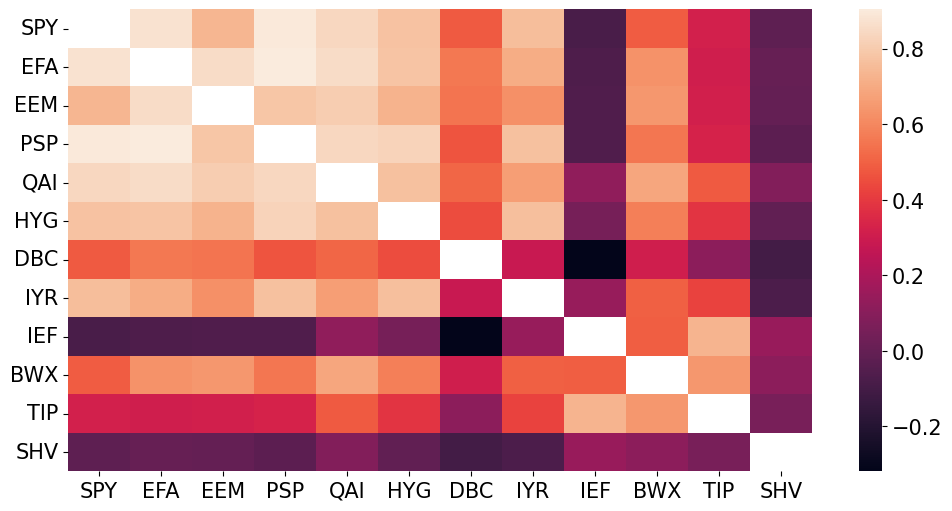

In [19]:
corr_matrix = rets.corr()
#ignore self-correlation
corr_matrix[corr_matrix==1] = None
sn.heatmap(corr_matrix)

In [20]:
corr_rank = corr_matrix.unstack().sort_values().dropna()
pair_max = corr_rank.index[-1]
pair_min = corr_rank.index[0]

print(f'MIN Correlation pair is {pair_min}')
print(f'MAX Correlation pair is {pair_max}')

MIN Correlation pair is ('DBC', 'IEF')
MAX Correlation pair is ('EFA', 'PSP')


## 1.2 Multivariate Regression

Suppose that we want to decompose `PSP` into a linear combination of other asset classes.
* `PSP` is a benchmark of private equity returns.
* There is substantial research (and controversy) as to whether private equity returns can be produced from other simple assets.
* We will see.

$$r_t^{\text{PSP}} = \alpha + \boldsymbol{\beta}\boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}_t$ denotes the vector of all the other returns (excluding PSP) at time $t$.

Report
* the estimated alpha
* the estimated betas
* the r-squared

#### Python tip
Consider forming `X = rets.drop(columns=['PSP'])`.

Consider using one of the following for the regression.
* `statsmodels.OLS`
* `sklearn.linear_models.LinearRegression()`

The former will include various regression statistics. The latter will just produce the estimates.

In [21]:
X = rets.drop(columns=['PSP'])
X_constant = sm.add_constant(X)
y = rets[['PSP']]

ols = sm.OLS(y, X_constant).fit()
print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:                    PSP   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     132.1
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           3.29e-77
Time:                        22:22:22   Log-Likelihood:                 443.72
No. Observations:                 182   AIC:                            -863.4
Df Residuals:                     170   BIC:                            -825.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.002     -0.794      0.4

## 1.3 Interpretation

Based on your estimates, do you think it is feasible to replicate `PSP` with these other assets? Be specific, citing your answers to the previous question. What does $\alpha$ indicate? What does the r-squared statistic indicate?

### Answer
Yes, it is feasible to replicate PSP with these other assets because the R-squared is almost 0.90. This means that almost 90% of the variation in PSP can be explained by the variation in these indices. 
$\alpha$ represent the return when all other returns are equal to $0$, and it has a negative value, meaning that if we had zero returns on all other assets, the returns on PSP would be negative. 

## 1.4 Multicollinearity

Should we be worried about multicollinearity in this case?

Calculate some metrics about $X'X$, (noting that in our case "$X$" is the array of return data, excluding `PSP`.

* determinant
* conditioning number

What do these metrics indicate?

#### Python tip
You may find these `numpy` functions helpful:
* `numpy.linalg.cond()`
* `numpy.linalg.det()`

In [22]:
print(f"The determinant is {np.linalg.det(X.T@X)} which is greater than zero. The matrix is invertible. But note that it is close to zero. Is must have a strong correlation")

print(f"The conditioning number is {np.linalg.cond(X.T@X)}")

The determinant is 4.732100103650244e-16 which is greater than zero. The matrix is invertible. But note that it is close to zero. Is must have a strong correlation
The conditioning number is 4775.532417793677


## 1.5 Impact of multicollinearity

With multicollinearity, we are concerned that the regression estimates
* are imprecise.
* will change a lot in response to small changes in new data.
* will perform badly out of sample.

To investigate...
* report the t-stats of the betas

## 1.X Extra: 
Estimate the regression, but this time using only data through 2019. 
* Apply these estimated betas to the data in 2020-2022 to construct the replication of `PSP` ($\hat{y}$) out of sample.
* What is the correlation of PSP in 2020-2022 versus this out-of-sample regression estimate?

Graph `PSP` against the regression estimate, both through 2019 (in sample) and 2020-2022 (out of sample.)

In [23]:
X_2019 = rets.loc[(rets.index <= '2019-12-31')].drop(columns=['PSP'])
X_constant_2019 = sm.add_constant(X_2019)
y_2019 = rets.loc[(rets.index <= '2019-12-31')][['PSP']]

ols = sm.OLS(y_2019, X_constant_2019).fit()

betas = ols.params 
# Step 2: Select the data for the 2020-2022 period
X_restricted = rets.loc[(rets.index <= '2022-12-31') & (rets.index >= '2020-01-01')].drop(columns=['PSP'])

# Step 3: Add a constant to the selected data (for the intercept)
X_restricted = sm.add_constant(X_restricted)

# Step 4: Estimate y using the betas
y_estimated_oos = X_restricted.dot(betas)

y_oos = rets.loc[(rets.index <= '2022-12-31') & (rets.index >= '2020-01-01')][['PSP']]

print(f"The correlation of PSP in 2020-2022 vs the out of sample replication of PSP is {y_oos.squeeze().corr(y_estimated_oos)}. Extremely close to 1")


The correlation of PSP in 2020-2022 vs the out of sample replication of PSP is 0.963796503789181. Extremely close to 1


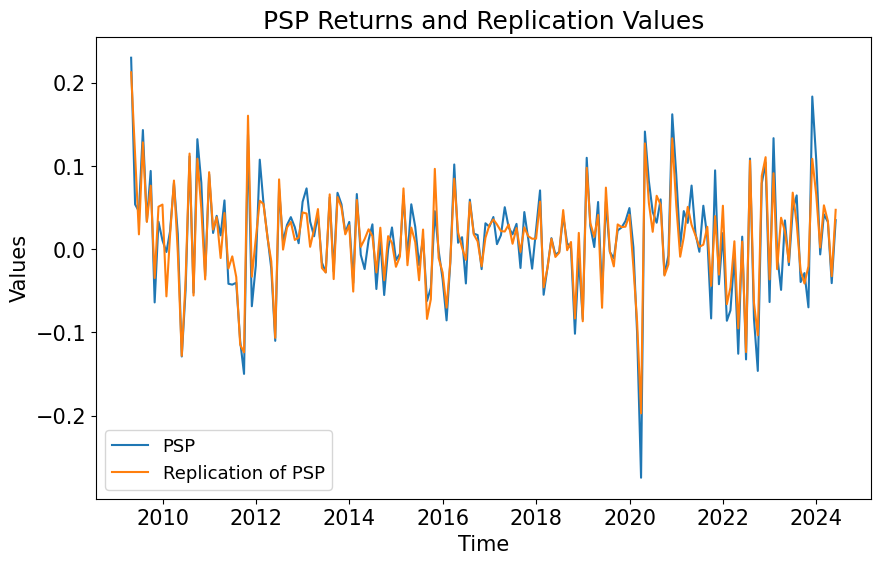

In [24]:
y_estimated = X_constant.dot(betas)

plt.figure(figsize=(10, 6))
plt.plot(y, label='PSP')
plt.plot(y_estimated, label='Replication of PSP')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('PSP Returns and Replication Values')
plt.legend()
plt.show()

# Appendix: Condition number of a matrix

$\newcommand{\olsb}{\boldsymbol{b}}$
$\newcommand{\olsy}{\boldsymbol{y}}$

Consider the linear equation

$$\olsy = a + X\olsb + e$$

Solving for $\olsb$,
$$(X'X)\olsb = X'\olsy$$

Denote the condition number of $X'X$ as $\kappa$.

Then,
$$\frac{||\delta \olsb||}{||\olsb||} \le \kappa \frac{||\delta X'\olsy||}{||X'\olsy||}$$

#### This says that 
- estimation error of size $\delta$ in the covariation of $X$ and $\olsy$ 
- will lead to errors up to size $\kappa\delta$ in the estimation of $\olsb$.

***

# 2 Heteroskedasticity \& Serial Correlation

$$\newcommand{\rspyt}{r_{\text{spy}}}$$
$$\newcommand{\rspyt}{r_{\text{spy},t}}$$

## Data

This problem uses the file, `../data/spy_rates_data.xlsx`.
* Return rates for SPY, the return on the S\&P 500. Denote this as $\rspyt$.
* Dividend-price ratio for the S\&P 500.
* 10-year yields on US Treasuries.

In [25]:
# Read the data
rets_spy = pd.DataFrame(pd.read_excel(r'../data/spy_rate_data.xlsx'))

# Replace the names
rets_spy.columns = ['date', 'SPY', '10y_yield', 'dvd_price_ration']

rets_spy.set_index('date', inplace=True)



## 2.1
Use linear regression to calculate whether S\&P 500 returns (SPY) are impacted by 10-year yields and the dividend-price ratio.

$$\begin{align}
\rspyt = \alpha + \boldsymbol{\beta}'\boldsymbol{X}_t + \epsilon_t
\label{eq:spy_on_macro}
\end{align}$$

where $\boldsymbol{X}$ denotes the matrix of values of the 10-year-yield and the dividend-price ratio.

Report the betas.

## 2.2
Try using `statsmodels.OLS` to estimate the regression, and print the "summary" of the results which will show the t-stats, p-values, etc. Are either of the regressors are statistically significant?

In [26]:
X = rets_spy.drop(columns=['SPY'])
X_constant = sm.add_constant(X)
y = rets_spy[['SPY']]

ols = sm.OLS(y, X_constant).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    SPY   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     4.465
Date:                Tue, 20 Aug 2024   Prob (F-statistic):             0.0125
Time:                        22:22:22   Log-Likelihood:                 423.48
No. Observations:                 239   AIC:                            -841.0
Df Residuals:                     236   BIC:                            -830.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0741      0.023  

### Answer
Yes, the results for both variables are statistically significant both 10-year yield and the dividend ratio. The coefficients (betas) are negative, meaning that both variable have a negative effect on the SPY returns. 

## 2.3
Calculate the correlation between the sample residuals, $e_t$, and their lagged value, $e_{t-1}$. Are they highly correlated? You may find it helpful to use .shift in pandas to get the lagged series.

In [27]:
residuals = ols.resid

lagged_residuals = residuals.shift(1)

rho = residuals.corr(lagged_residuals)

print(f'Serial correlation of residuals is {rho:.2%}.')

Serial correlation of residuals is 5.09%.


## 2.4
Calculate the regression of
$$e_t = \alpha + \boldsymbol{\beta}'\boldsymbol{X}_t + u_t$$

## 2.5
What do the previous two calculations have to do with identifying serial correlation and heteroskedasticity?

In [30]:
ols_errors = sm.OLS(residuals ** 2, X_constant).fit()
print(ols_errors.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     8.172
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           0.000370
Time:                        22:22:59   Log-Likelihood:                 1087.1
No. Observations:                 239   AIC:                            -2168.
Df Residuals:                     236   BIC:                            -2158.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0041      0.001  

### Answer
This indicates that there is no serial correlation and the errors are homokedastic.

The regression of sample residuals (squared) is giving us information as to whether the residual variance is always the same distribution, (homoskedastic,) or whether it varies with different conditioning info, $X$, (heteroskedastic.) 

Thus, if any of the betas are significant, it tells us that the residuals are heteroskedastic.